In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from src.util import read_video_frames, display_image, render_scene, get_character_placeholder
from src.tracking import get_bounding_boxes_for_class
from src.operations3d import get_box_meshes
from src.operations2d import get_2d_bounding_boxes
from src.util import display_image, draw_bounding_boxes

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


final text_encoder_type: bert-base-uncased


[02/04 16:44:09 detectron2]: Rank of current process: 0. World size: 1
[02/04 16:44:10 detectron2]: Environment info:
-------------------------------  -------------------------------------------------------------------------------------------
sys.platform                     linux
Python                           3.8.20 (default, Oct  3 2024, 15:24:27) [GCC 11.2.0]
numpy                            1.24.4
detectron2                       0.6 @/home/max/miniconda3/envs/instruct360/lib/python3.8/site-packages/detectron2
Compiler                         GCC 13.3
CUDA compiler                    not available
DETECTRON2_ENV_MODULE            <not set>
PyTorch                          2.4.1+cu121 @/home/max/miniconda3/envs/instruct360/lib/python3.8/site-packages/torch
PyTorch debug build              False
torch._C._GLIBCXX_USE_CXX11_ABI  False
GPU available                    No: torch.cuda.is_available() == False
Pillow                           10.4.0
torchvision                      0.19

Using cache found in /home/max/.cache/torch/hub/facebookresearch_dinov2_main


final text_encoder_type: bert-base-uncased
[02/04 16:44:13 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from checkpoints/ovmono3d_lift.pth ...
[02/04 16:44:13 fvcore.common.checkpoint]: [Checkpointer] Loading from checkpoints/ovmono3d_lift.pth ...
WARNING [02/04 16:44:13 fvcore.common.checkpoint]: Some model parameters or buffers are not found in the checkpoint:
roi_heads.groundingdino_model.backbone.0.layers.0.blocks.0.attn.proj.{bias, weight}
roi_heads.groundingdino_model.backbone.0.layers.0.blocks.0.attn.qkv.{bias, weight}
roi_heads.groundingdino_model.backbone.0.layers.0.blocks.0.attn.{relative_position_bias_table, relative_position_index}
roi_heads.groundingdino_model.backbone.0.layers.0.blocks.0.mlp.fc1.{bias, weight}
roi_heads.groundingdino_model.backbone.0.layers.0.blocks.0.mlp.fc2.{bias, weight}
roi_heads.groundingdino_model.backbone.0.layers.0.blocks.0.norm1.{bias, weight}
roi_heads.groundingdino_model.backbone.0.layers.0.blocks.0.norm2.{bias, weight}


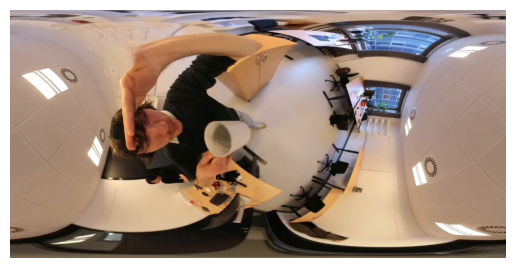

In [10]:
video_path = "vids/office.mp4"
frame_index = 60
input_frame = read_video_frames(video_path)[frame_index]
display_image(input_frame)

In [11]:
classes = {
    "cupboard": (255, 0, 0),  # Red
    "cup": (0, 255, 0),       # Green
    "chair": (0, 0, 255)      # Blue
}

Draw 2d bounding boxes

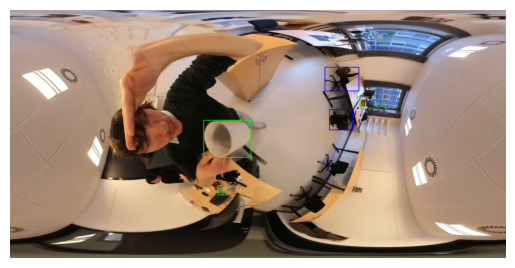

In [12]:
bb_frame = input_frame.copy()
for class_name, color in classes.items():
    bbs_2d = get_2d_bounding_boxes(input_frame, class_name, threshold=0.25)
    bb_frame = draw_bounding_boxes(bb_frame, bbs_2d, color=color, thickness=2)
display_image(bb_frame)

Get 3d bounding boxes

In [23]:
bbs_3d = {}
for class_name in classes.keys():
    print(f"Getting bounding boxes for class: {class_name}")
    bbs_3d[class_name] = get_bounding_boxes_for_class(input_frame, class_name, threshold_2d=0.25,threshold_3d=0.3)


[02/04 17:33:21 detectron2]: Rank of current process: 0. World size: 1
[02/04 17:33:21 detectron2]: Environment info:
-------------------------------  -------------------------------------------------------------------------------------------
sys.platform                     linux
Python                           3.8.20 (default, Oct  3 2024, 15:24:27) [GCC 11.2.0]
numpy                            1.24.4
detectron2                       0.6 @/home/max/miniconda3/envs/instruct360/lib/python3.8/site-packages/detectron2
Compiler                         GCC 13.3
CUDA compiler                    not available
DETECTRON2_ENV_MODULE            <not set>
PyTorch                          2.4.1+cu121 @/home/max/miniconda3/envs/instruct360/lib/python3.8/site-packages/torch
PyTorch debug build              False
torch._C._GLIBCXX_USE_CXX11_ABI  False
GPU available                    No: torch.cuda.is_available() == False
Pillow                           10.4.0
torchvision                      0.19

Using cache found in /home/max/.cache/torch/hub/facebookresearch_dinov2_main


final text_encoder_type: bert-base-uncased
[02/04 17:33:25 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from checkpoints/ovmono3d_lift.pth ...
[02/04 17:33:25 fvcore.common.checkpoint]: [Checkpointer] Loading from checkpoints/ovmono3d_lift.pth ...
WARNING [02/04 17:33:25 fvcore.common.checkpoint]: Some model parameters or buffers are not found in the checkpoint:
roi_heads.groundingdino_model.backbone.0.layers.0.blocks.0.attn.proj.{bias, weight}
roi_heads.groundingdino_model.backbone.0.layers.0.blocks.0.attn.qkv.{bias, weight}
roi_heads.groundingdino_model.backbone.0.layers.0.blocks.0.attn.{relative_position_bias_table, relative_position_index}
roi_heads.groundingdino_model.backbone.0.layers.0.blocks.0.mlp.fc1.{bias, weight}
roi_heads.groundingdino_model.backbone.0.layers.0.blocks.0.mlp.fc2.{bias, weight}
roi_heads.groundingdino_model.backbone.0.layers.0.blocks.0.norm1.{bias, weight}
roi_heads.groundingdino_model.backbone.0.layers.0.blocks.0.norm2.{bias, weight}


/home/max/miniconda3/envs/instruct360/lib/python3.8/site-packages/fvcore/common/checkpoint.py:252: FutureWarning:

You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.

/home/max/miniconda3/envs/in

Getting bounding boxes for class: cup


/home/max/miniconda3/envs/instruct360/lib/python3.8/site-packages/transformers/modeling_utils.py:1161: FutureWarning:

The `device` argument is deprecated and will be removed in v5 of Transformers.

/home/max/miniconda3/envs/instruct360/lib/python3.8/site-packages/torch/_dynamo/eval_frame.py:600: UserWarning:

torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. In version 2.4 we will raise an exception if use_reentrant is not passed. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variants.

/home/max/miniconda3/envs/instruct360/lib/python3.8/site-packages/torch/utils/checkpoint.py:92: UserWarning:

None of the inputs have requires_grad=True. Gradients will be None

/home/max/Documents/RA/instruct360/GroundingDINO/groundingdino/models/GroundingDINO/transformer.py:862: FutureWarning:

`torch.cuda.amp.autocast(args..

Getting bounding boxes for class: chair


/home/max/miniconda3/envs/instruct360/lib/python3.8/site-packages/transformers/modeling_utils.py:1161: FutureWarning:

The `device` argument is deprecated and will be removed in v5 of Transformers.

/home/max/miniconda3/envs/instruct360/lib/python3.8/site-packages/torch/_dynamo/eval_frame.py:600: UserWarning:

torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. In version 2.4 we will raise an exception if use_reentrant is not passed. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variants.

/home/max/miniconda3/envs/instruct360/lib/python3.8/site-packages/torch/utils/checkpoint.py:92: UserWarning:

None of the inputs have requires_grad=True. Gradients will be None

/home/max/Documents/RA/instruct360/GroundingDINO/groundingdino/models/GroundingDINO/transformer.py:862: FutureWarning:

`torch.cuda.amp.autocast(args..

Convert boxes to meshes and render them

In [24]:
meshes = []
for class_name, color in classes.items():
    box_meshes = get_box_meshes(bbs_3d[class_name], color)
    meshes.extend(box_meshes)

In [25]:
import open3d as o3d
character_placeholder = get_character_placeholder()
coordinate_frame = o3d.geometry.TriangleMesh.create_coordinate_frame(size=0.5, origin=[0, 0, 0])
scene = meshes + [character_placeholder, coordinate_frame]
render_scene(scene)